# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️В будущем для подгрузки данных рекомендую использовать конструкцию try-except или os.path, так удобнее работать с файлом локально.</div>

In [3]:
print(data)

      total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0      20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1      7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2      10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\..

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

Постоим гистограммы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

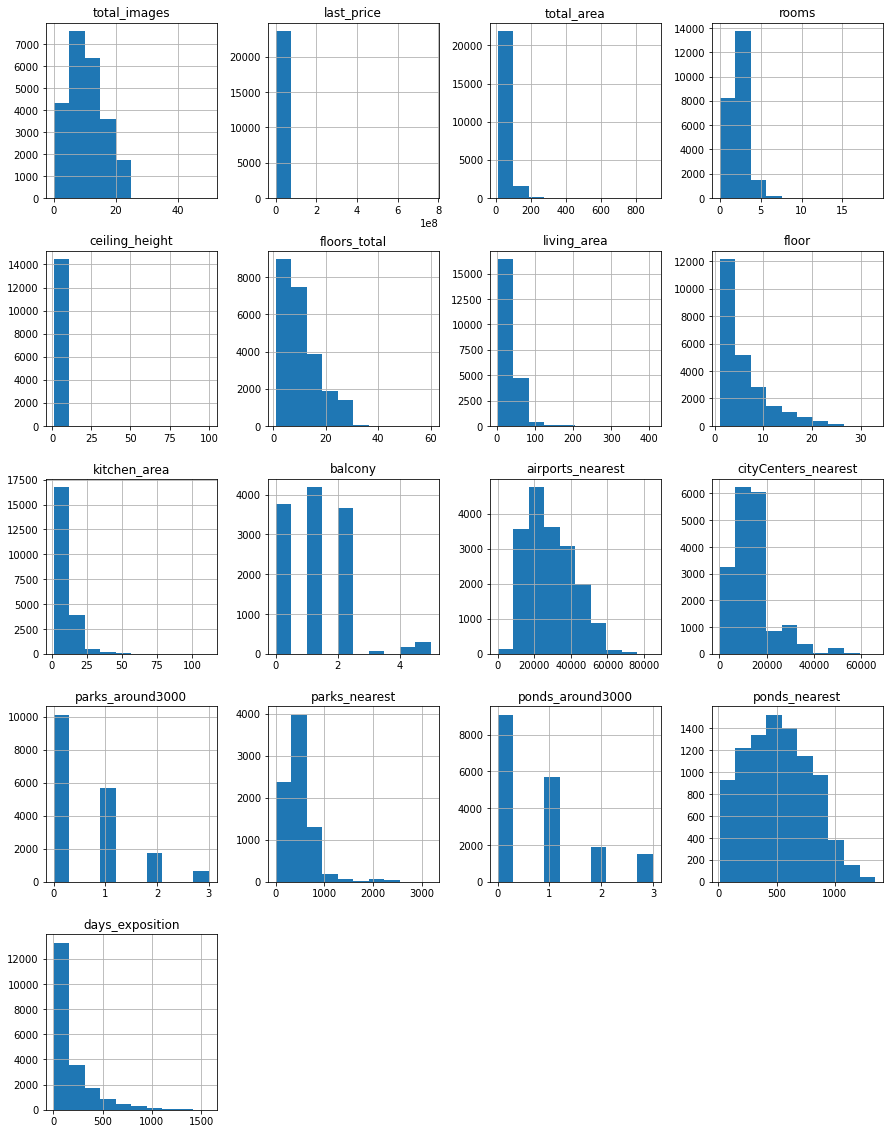

In [7]:
data.hist(figsize=(15, 20))

Вывод:

cityCenters_nearest необходимо переименовать. 

Так же есть пропуски: 

ceiling_height 14504 (высота потолков (м)), 
floors_total 23613 (всего этажей в доме),
living_area 21796 (жилая площадь в квадратных метрах (м²)),
is_apartment 2775 (апартаменты (булев тип)),
kitchen_area 21421 (площадь кухни в квадратных метрах (м²))
balcony 12180 (число балконов),
locality_name 23650 (название населённого пункта),
airports_nearest 18157 (расстояние до ближайшего аэропорта в метрах (м)),
cityCenters_nearest 18180 (расстояние до центра города (м)),
parks_around3000 18181 (число парков в радиусе 3 км),
parks_nearest 8079 (расстояние до ближайшего парка (м)),
ponds_around3000 18181 (число водоёмов в радиусе 3 км),
ponds_nearest 9110 (расстояние до ближайшего водоёма (м)),
days_exposition 20518 (сколько дней было размещено объявление (от публикации до снятия)).

Пропусков нет в:

total_images 23699 (число фотографий квартиры в объявлении),
last_price 23699 (цена на момент снятия с публикации),
total_area 23699 (общая площадь квартиры в квадратных метрах (м²)),
first_day_exposition 23699 (дата публикации),
rooms 23699 (число комнат),
floor 23699 (этаж),
studio 23699 (квартира-студия (булев тип)),
open_plan 23699 (свободная планировка (булев тип)),

### Предобработка данных

Переименовываем столбец cityCenters_nearest в city_сenters_nearest

In [9]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

Проверяем количество пропущенных значений

In [10]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Описание пропусков:

- 9195 пропусков ceiling_height (высота потолков (м)), значение Null запомним медианным значением; 
- 86 пропусков floors_total (всего этажей в доме) пропуском мало, возможно не заполнили, оставим со значением Null;
- 1903 пропусков living_area (жилая площадь в квадратных метрах (м²)) оставим без изменения, со значением Null; 
- 20924 пропусков is_apartment (апартаменты (булев тип)), пропуски не будем относить к апартаментам, поменяем на False;
- 2278 пропусков kitchen_area (площадь кухни в квадратных метрах (м²)) нужно проверить, вдруг это студия, если нет, то оставим Null;
- 11519 пропусков balcony (число балконов) пропуски засчитаем за отсутвие балкона и заполним пропуски 0
- 49 пропусков locality_name (название населённого пункта) оставим без изменения, со значением Null;
- 5542 пропусков airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), пропуски засчитаем за отсутсвие аэропортов, оставляем Null;
- 5519 пропусков city_centers_nearest (расстояние до центра города (м)) оставим без изменения, оставляем Null;
- 5518 пропусков parks_around3000 (число парков в радиусе 3 км) парков в радиусе 3 км нет, оставляем Null; 
- 15620 пропусков parks_nearest (расстояние до ближайшего парка (м)) парков нет, оставляем Null;
- 5518 пропусков ponds_around3000 (число водоёмов в радиусе 3 км) прудов в радиусе 3км нет, оставляем Null;
- 14589 пропусков ponds_nearest (расстояние до ближайшего водоёма (м)) прудов нет, оставляем Null;
- 3181 пропусков days_exposition (сколько дней было размещено объявление (от публикации до снятия)) объявление не было опубликовано, оставляем Null.

заполним пропуски в ceiling_height медианным значением

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Меняем Null на False в столбце is_apartment

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Заполняя пропуски значением 0 в столбце balcony

In [14]:
data['balcony'] = data['balcony'].fillna(0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Нужно сменить тип данных:

- last_price (цена на момент снятия с публикации) поменять на int64, так как цены выставляют в целых числах, без копеек;
- first_day_exposition (дата публикации) изменить date, так как ранее был текстовый формат;
- is_apartment (апартаменты (булев тип)) меняем на bool, так как нужно будет работать с булевым значением;
- balcony(число балконов) на int64, так как половина балкона тоже не может быть.



In [16]:
data['last_price'] = data['last_price'].astype('int64')

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [18]:
data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})

In [19]:
data['balcony'] = data['balcony'].astype('int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          20924 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Посмотрим уникальные значения по сталбцам имеющие тип object. К данному типу относиться столбец locality_name (название населённого пункта).

In [21]:
print('уникальные значения', data['locality_name'].nunique())

уникальные значения 364


In [22]:
# поменял на nunique()

In [23]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Для устрания дубликатов приводем всё к нижнему регистру, изменим ё на е, исправим "городской поселок" на "поселок городского типа".

In [24]:
data['locality_name'] = data['locality_name'].str.lower()

In [25]:
print('уникальные значения', data['locality_name'].nunique())

уникальные значения 364


In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace('городской поселок','поселок городского типа',regex=True)

In [27]:
print('уникальные значения', data['locality_name'].nunique())

уникальные значения 323


In [28]:
#data['locality_name'] = data['locality_name'].replace('городской поселок','поселок городского типа')

In [29]:
#print('уникальные значения', data['locality_name'].unique().shape[0])

In [30]:
print('уникальные значения', data['locality_name'].unique())

уникальные значения ['санкт-петербург' 'поселок шушары' 'поселок городского типа янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня 

Выыведим количество явнях дубликатов:

In [31]:
print('Количетво явных дубликатов', data.duplicated().sum())

Количетво явных дубликатов 0


Устранение неявных дубликатов

Заменяем поселок станции приветнинское на поселок железнодорожной станции приветнинское, поселок рябово на поселок городского типа рябово

In [32]:
data['locality_name'] = data['locality_name'].replace('поселок станции приветнинское', 'поселок железнодорожной станции приветнинское')

In [33]:
data['locality_name'] = data['locality_name'].replace('поселок рябово', 'поселок городского типа рябово')

In [34]:
print('уникальные значения', data['locality_name'].unique().shape[0])

уникальные значения 323


In [35]:
print('уникальные значения', data['locality_name'].unique())

уникальные значения ['санкт-петербург' 'поселок шушары' 'поселок городского типа янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня 

Устранение выбросов

Выведем на экран распределение значений с помощью describe()

In [36]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В total_images аномальных значений не наблюдается

В last_price посмотрим диапозон цен. Необходимо убрать слишком низкие по ценам и слишком высокие.

In [37]:
print(data['last_price'].max())

763000000


In [38]:
print(data['last_price'].min())

12190


Минимальная цена есть в 12190, что очень мало, Установим предел и найдем количесво квартир, которые стоят менее 100 т.р.

In [39]:
print('Квартир стоимостью меньше 100000:', data.query('last_price < 100000')['last_price'].count())

Квартир стоимостью меньше 100000: 1


Квартир имеющих цену менее 100 т. всего 1, ее учитывать не бумем.

Максимальная стоимость квартиры 763000000, что очень много. Установим верхний предел и в 100 млн, и подсчитаем количество.

In [40]:
print('Квартир стоимостью больше 100000000:', data.query('last_price > 100000000')['last_price'].count())

Квартир стоимостью больше 100000000: 37


Подсчитаем количесвтво квартир стоимостью более 50 млн.

In [41]:
print('Квартир стоимостью больше 50000000:', data.query('last_price > 50000000')['last_price'].count())

Квартир стоимостью больше 50000000: 131


Крартир стоимостью более 50 млн составляет 131. Квартиры такой цены вполне реальны, это могут быть вполне элитные дома. Квартир более 100 млн 37, квартиры такой смоимости тоже могут существовать, но они могут повлиять на дальнейшие расчеты. Поэтому уберем квартиры стоимостью выше 100 млн..

Удаляем, которые вышли за диапозон от 100000 до 100000000

In [42]:
# Расширил комментарии, предпологаю что диапозон от 100 т.р до 100 млн будет оптимальным.

In [43]:
data.drop(index=data.query('last_price < 100000').index,inplace=True)
#data = data.drop(data[data.last_price < 100000].index)

In [44]:
data.drop(index=data.query('last_price > 100000000').index,inplace=True)
#data = data.drop(data[data.last_price > 100000000].index)

Проверяем

In [45]:
print('Квартиры стоимостью меньше 100000:', data.query('last_price < 100000')['last_price'].count())
print(data['last_price'].min())

Квартиры стоимостью меньше 100000: 0
430000


In [46]:
print('Квартиры стоимостью больше 100000000:', data.query('last_price > 100000000')['last_price'].count())
print(data['last_price'].max())

Квартиры стоимостью больше 100000000: 0
99000000


Диавозон цены составляет от 430 т. до 99 млн, цены вполне логичны, в небольших поселках могут быть квартиры стоимостью в 430 т., так же как и элитные квартры в стоимостью 99 млн.

In [47]:
print(data['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23661, dtype: int64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

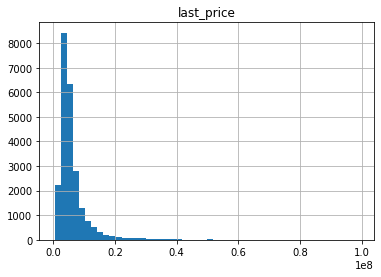

In [48]:
data.hist('last_price', bins=50)

Выведем заново распределение значений с помощью describe()

In [49]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23661.000000,2.366100e+04,23661.000000,23661.000000,23661.000000,23575.000000,21763.000000,23661.000000,21389.000000,23661.000000,18120.000000,18143.000000,18144.000000,8052.000000,18144.000000,9077.000000,20485.000000
mean,9.849372,6.251771e+06,59.925974,2.065720,2.723343,10.679194,34.251736,5.892228,10.526017,0.591268,28797.970475,14211.298628,0.609513,491.087432,0.767747,518.659579,180.649939
std,5.679430,6.424397e+06,33.470704,1.069614,0.988264,6.598674,21.175637,4.885161,5.743847,0.959143,12641.796992,8605.150486,0.800099,342.670330,0.936479,277.794757,219.559366
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18573.750000,9267.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.635000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26737.000000,13114.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37294.000000,16297.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,9.900000e+07,590.000000,19.000000,100.000000,60.000000,409.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В total_area минимальный размер квартиры 12 кв.м, максимальный 900 кв.м. Узнаем количество квартир имеющие менее 12 кв.м и более 500 кв.м

In [50]:
print('Количество квартир имеющие менее 12 кв.м:', data.query('total_area <= 12')['total_area'].count())
print('Количество квартир имеющие менее 15 кв.м:', data.query('total_area <= 15')['total_area'].count())

Количество квартир имеющие менее 12 кв.м: 1
Количество квартир имеющие менее 15 кв.м: 8


In [51]:
print('Количество квартир имеющие более 500 кв.м:', data.query('total_area >= 500')['total_area'].count())
print('Количество квартир имеющие более 590 кв.м:', data.query('total_area >= 590')['total_area'].count())

Количество квартир имеющие более 500 кв.м: 3
Количество квартир имеющие более 590 кв.м: 1


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

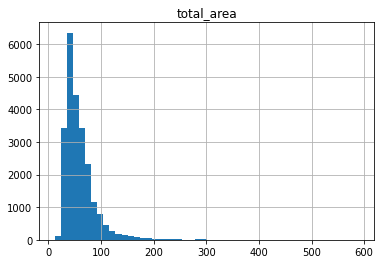

In [52]:
data.hist('total_area', bins=50)

8 квартир имею площадь менее 15 кв.м., такие квартры бывают, удалять их не будем, так же как и вартиры более 500 кв.м., которых всего 3

В столбце rooms присутствуют квартиры без комнат, максимальное количество комнат 19

In [53]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

Квартиры без комнат: 197


Узнаем количесво количесвто без комнат студий, апартаментов или со свободной планировкой

In [54]:
k_st = data.query('rooms == 0 and studio')['rooms'].count()
print('Квартиры без комнат и студии:', k_st)

Квартиры без комнат и студии: 138


In [55]:
k_ap = data.query('rooms == 0 and is_apartment')['rooms'].count()
print('Квартиры без комнат и апартаменты:', k_ap)

Квартиры без комнат и апартаменты: 0


In [56]:
k_s_pl = data.query('rooms == 0 and open_plan')['rooms'].count()
print('Квартиры без комнат и свободная планировка:',k_s_pl)

Квартиры без комнат и свободная планировка: 59


Похоже, что квартирами без комнат являются студии и квартиры свободной планировки

In [57]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())
print('количество студий и квартир свободнйо планировки:',k_st+k_s_pl)

Квартиры без комнат: 197
количество студий и квартир свободнйо планировки: 197


Узнаем количество квартир имеющих более 15 комнат

In [58]:
print('Количество квартир имеющих комнат более 15:', data.query('rooms >= 15')['rooms'].count())
print('Количество квартир имеющих комнат более 19:', data.query('rooms >= 19')['rooms'].count())

Количество квартир имеющих комнат более 15: 3
Количество квартир имеющих комнат более 19: 1


Удалять квартиры без комнат не будем. 3 квартир имеют 15 комнат и более, такое бывает, удалять не будем.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

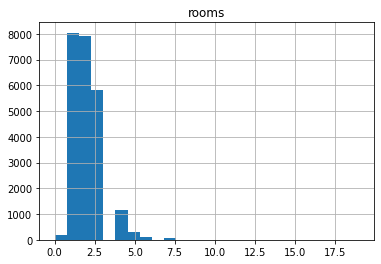

In [59]:
data.hist('rooms', bins=25)

In [60]:
print(data['rooms'].unique())
print('Количество квартир имеющих 0 комнат:', data.query('rooms == 0')['rooms'].count())
print('Количество квартир имеющих 1 комнат:', data.query('rooms == 1')['rooms'].count())
print('Количество квартир имеющих 2 комнат:', data.query('rooms == 2')['rooms'].count())
print('Количество квартир имеющих 3 комнат:', data.query('rooms == 3')['rooms'].count())
print('Количество квартир имеющих 4 комнат:', data.query('rooms == 4')['rooms'].count())
print('Количество квартир имеющих 5 комнат:', data.query('rooms == 5')['rooms'].count())
print('Количество квартир имеющих 6 комнат:', data.query('rooms == 6')['rooms'].count())
print('Количество квартир имеющих 7 комнат:', data.query('rooms == 7')['rooms'].count())
print('Количество квартир имеющих 8 комнат:', data.query('rooms == 9')['rooms'].count())
print('Количество квартир имеющих 9 комнат:', data.query('rooms == 9')['rooms'].count())
print('Количество квартир имеющих 10 комнат:', data.query('rooms == 10')['rooms'].count())
print('Количество квартир имеющих 11 комнат:', data.query('rooms == 11')['rooms'].count())
print('Количество квартир имеющих 12 комнат:', data.query('rooms == 12')['rooms'].count())
print('Количество квартир имеющих 13 комнат:', data.query('rooms == 13')['rooms'].count())
print('Количество квартир имеющих 14 комнат:', data.query('rooms == 14')['rooms'].count())
print('Количество квартир имеющих 15 комнат:', data.query('rooms == 15')['rooms'].count())
print('Количество квартир имеющих 16 комнат:', data.query('rooms == 16')['rooms'].count())
print('Количество квартир имеющих 17 комнат:', data.query('rooms == 17')['rooms'].count())
print('Количество квартир имеющих 18 комнат:', data.query('rooms == 18')['rooms'].count())
print('Количество квартир имеющих 19 комнат:', data.query('rooms == 19')['rooms'].count())


[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16]
Количество квартир имеющих 0 комнат: 197
Количество квартир имеющих 1 комнат: 8047
Количество квартир имеющих 2 комнат: 7938
Количество квартир имеющих 3 комнат: 5810
Количество квартир имеющих 4 комнат: 1171
Количество квартир имеющих 5 комнат: 316
Количество квартир имеющих 6 комнат: 100
Количество квартир имеющих 7 комнат: 54
Количество квартир имеющих 8 комнат: 8
Количество квартир имеющих 9 комнат: 8
Количество квартир имеющих 10 комнат: 3
Количество квартир имеющих 11 комнат: 2
Количество квартир имеющих 12 комнат: 0
Количество квартир имеющих 13 комнат: 0
Количество квартир имеющих 14 комнат: 2
Количество квартир имеющих 15 комнат: 1
Количество квартир имеющих 16 комнат: 1
Количество квартир имеющих 17 комнат: 0
Количество квартир имеющих 18 комнат: 0
Количество квартир имеющих 19 комнат: 1


В столбце ceiling_height высота потолков есть значение от 1 до 100 м, что является не нормальным

In [61]:
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

1.0
100.0


In [62]:
print(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.     2.79   2.95   4.06   2.94   3.54   3.53   2.83
   2.4    3.38   3.01   5.6    3.65   3.9    3.18   3.35   2.3    3.57
   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95   3.75   2.88
   3.67   3.87   3.66   3.86   4.19   3.24   4.8    4.5    4.2    3.36
  32.     3.08   3.68   3.07   3.37   3.09   8.     3.26   3.34   2.81
   3.44   2.97   3.14   4.37   2.68   3.22   3.27  27.     4.1    2.93
   3.46  24.     3.47   3.33   3.63   3.32  26.     1.2    8.3    2.98
   2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23   3.02
   3.21 

Подсчитаем сколько квартир высотой менее 1.8 м

In [63]:
print('Квартиры менее 1,8 м:', data.query('ceiling_height <= 1.8')['ceiling_height'].count())

Квартиры менее 1,8 м: 3


Подсчитаем сколько квартир высотой более 4 м

In [64]:
print('Квартиры менее 4 м:', data.query('ceiling_height >= 4')['ceiling_height'].count())

Квартиры менее 4 м: 110


Слишком много получается квартир, разобьем на диапозоны

In [65]:
print('Квартир с потолками от 4 до 5м: ', (data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()))

Квартир с потолками от 4 до 5м:  37


In [66]:
print('Квартир с потолками от 5 до 25м: ', (data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()))

Квартир с потолками от 5 до 25м:  14


In [67]:
print('Квартир с потолками от 25м до 36м: ', (data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()))

Квартир с потолками от 25м до 36м:  19


In [68]:
print('Квартир с потолками от 36м до 50м: ', (data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()))

Квартир с потолками от 36м до 50м:  0


In [69]:
print('Квартир с потолками от 50м: ', (data.query('ceiling_height >= 50')['ceiling_height'].count()))

Квартир с потолками от 50м:  1


Для квартир с высотой потолков до 20 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.0 и 3.6 метра.

In [70]:
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

In [71]:
print(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58   3.7
   2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92   3.11
   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74   2.96
   2.46   5.     2.79   2.95   4.06   2.94   3.54   3.53   2.83   2.4
   3.38   3.01   5.6    3.65   3.9    3.18   3.35   2.3    3.57   2.48
   2.62   2.82   3.98   2.63   3.83   3.52   3.95   3.75   2.88   3.67
   3.87   3.66   3.86   4.19   3.24   4.8    4.5    4.2    3.36   3.08
   3.68   3.07   3.37   3.09   8.     3.26   3.34   2.81   3.44   2.97
   3.14   4.37   2.68   3.22   3.27   4.1    2.93   3.46   3.47   3.33
   3.63   3.32   1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5.5    3.84   3.23   3.02   3.21   3.43   3.78   4.3    3.39
   2.69   

Сгруппируем новые группы и подсчитаем их колличество, это кваритиры у которых высота потолка менее 1.8 м и квартиры имеющие высоту потолка более 4.5 м

In [72]:
print('Квартиры менее 1,8 м:', data.query('ceiling_height <= 1.8')['ceiling_height'].count())
print('Квартиры менее 4,5 м:', data.query('ceiling_height >= 4.5')['ceiling_height'].count())

Квартиры менее 1,8 м: 3
Квартиры менее 4,5 м: 23


In [73]:
# исправил комментарии

In [74]:
print('Квартиры менее 1,8 м:', data.query('ceiling_height <= 1.8')['ceiling_height'].count())
print('Квартиры более 4,5 м:', data.query('ceiling_height >= 4.5')['ceiling_height'].count())

Квартиры менее 1,8 м: 3
Квартиры более 4,5 м: 23


Имеем 3 квартиры с высотой потолка менее 1.8 м и 23 квартиры с высотой потолка более 4.5 м. Данные квартиры уберем.

In [75]:
data.drop(index=data.query('ceiling_height < 1.8').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4.5').index,inplace=True)

In [76]:
print(data['ceiling_height'])

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23642, dtype: float64


Обновим распределение значений

In [77]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23642.000000,2.364200e+04,23642.000000,23642.000000,23642.000000,23556.000000,21747.000000,23642.000000,21376.000000,23642.000000,18105.000000,18127.000000,18128.000000,8040.000000,18128.000000,9067.000000,20467.000000
mean,9.848067,6.242092e+06,59.886781,2.065561,2.694879,10.679487,34.231449,5.891845,10.524122,0.591236,28800.174758,14214.965356,0.608892,491.168532,0.767266,518.870519,180.642009
std,5.677806,6.377304e+06,33.252690,1.068809,0.211959,6.596655,21.053163,4.884186,5.741806,0.958901,12644.790801,8605.793982,0.799647,342.718518,0.936062,277.780380,219.558303
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18573.000000,9274.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.630000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26750.000000,13114.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37310.000000,16298.000000,1.000000,612.000000,1.000000,731.000000,231.000000
max,50.000000,9.900000e+07,590.000000,19.000000,4.500000,60.000000,409.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Столбец floors_total оставляем без изменений, так как есть и одноэтажные многоквартирные дома, так же есть небольшое количество квартир в 30 и более этажных домах.

In [78]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в домах от 2 до 29 : ',data.query('floors_total >= 2' and 'floors_total <= 29')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  25
Квартир в домах от 2 до 29 :  23525
Квартир в 30+ этажных домах :  31


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

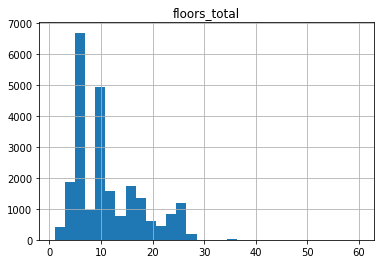

In [79]:
data.hist('floors_total', bins=30)

В living_area диапозон дилой площади очень большой, от 2 до 409 кв.м.

In [80]:
print(data['living_area'].min())
print(data['living_area'].max())

2.0
409.0


Установим минимум 12 кв.м, подсчитаем количесво квартир имеющих менее 12 кв.м жилой площади

In [81]:
print('Количество квартир имеющих жилую площадь менее 10 кв.м : ',data.query('living_area <=10')['living_area'].count())

Количество квартир имеющих жилую площадь менее 10 кв.м :  58


Так же установим верхний виапозон, подсчитаем квартиры имеющие жилую площадь более 300 кв.м

In [82]:
print('Количество квартир имеющих жилую площадь более 300 кв.м : ',data.query('living_area >=300')['living_area'].count())

Количество квартир имеющих жилую площадь более 300 кв.м :  5


In [83]:
# исправил комментарии

Уберем квартиры которые имеют жилую площадь менее 10 кв.м и более 300 кв.м

In [84]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 300').index,inplace=True)

In [85]:
# исправил комментарии

In [86]:
print(data['living_area'])

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23613, dtype: float64


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

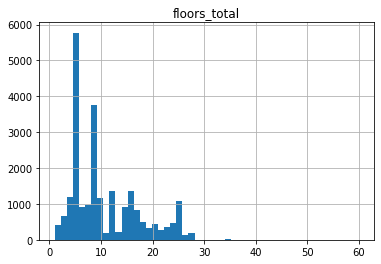

In [87]:
data.hist('floors_total', bins=50)

Обновим распределение значений

In [88]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23527.000000,21718.000000,23613.000000,21350.000000,23613.000000,18078.000000,18099.000000,18100.000000,8023.000000,18100.000000,9053.000000,20442.000000
mean,9.846737,6.231628e+06,59.826253,2.065176,2.694729,10.677264,34.206346,5.889764,10.509117,0.591327,28800.333776,14219.739488,0.608453,491.026424,0.767127,518.762068,180.626504
std,5.677064,6.324919e+06,32.700978,1.064431,0.211583,6.594987,20.629620,4.882128,5.694443,0.959106,12648.874135,8606.898376,0.799473,342.479422,0.935852,277.492969,219.556577
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,10.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9282.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.630000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26743.500000,13116.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37312.250000,16300.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,9.900000e+07,494.100000,19.000000,4.500000,60.000000,300.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


floor - этаж. Здесь нет нулевых значений и слишком больших значений. Оставляем без изменений

В kitchen_area необходиом просмотреть имеющую маленькую плоащть и большую

In [89]:
print(data['kitchen_area'].min())
print(data['kitchen_area'].max())

1.3
107.0


Установим диапозон и подсчитаем, сколько квартир имеет кухню площадью менее 3 кв.м и более 70 кв.м

In [90]:
print('Кухни менее 3 кв.м : ',data.query('kitchen_area < 3')['kitchen_area'].count())
print('Кухни более 70 кв.м : ',data.query('kitchen_area > 70')['kitchen_area'].count())

Кухни менее 3 кв.м :  11
Кухни более 70 кв.м :  8


In [91]:
data.drop(index=data.query('kitchen_area  < 3').index,inplace=True)
data.drop(index=data.query('kitchen_area  > 70').index,inplace=True)

In [92]:
print(data['kitchen_area'])

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23594, dtype: float64


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

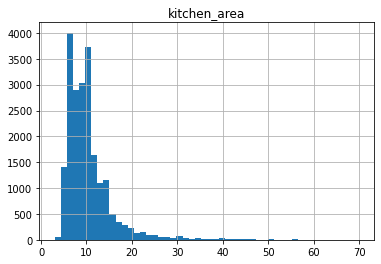

In [93]:
data.hist('kitchen_area', bins=50)

Обновим распределение значений

In [94]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23594.000000,2.359400e+04,23594.000000,23594.000000,23594.000000,23508.000000,21699.000000,23594.000000,21331.000000,23594.000000,18060.000000,18081.000000,18082.000000,8015.000000,18082.000000,9042.000000,20425.000000
mean,9.847758,6.213898e+06,59.795441,2.065228,2.694616,10.678322,34.196558,5.889675,10.484115,0.591549,28804.679457,14224.473812,0.608340,491.019214,0.766729,518.924464,180.604651
std,5.676821,6.224776e+06,32.604808,1.064420,0.211367,6.594766,20.605822,4.882313,5.484116,0.959104,12651.589814,8606.523405,0.799392,341.992850,0.935509,277.399881,219.516574
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,10.000000,1.000000,3.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,295.250000,45.000000
50%,9.000000,4.630000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26752.000000,13123.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.582500,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37315.250000,16306.000000,1.000000,612.000000,1.000000,730.750000,231.000000
max,50.000000,9.900000e+07,494.100000,19.000000,4.500000,60.000000,300.000000,33.000000,70.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


balcony (балконы) имеют нормальные значение, оставляем без изменения

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

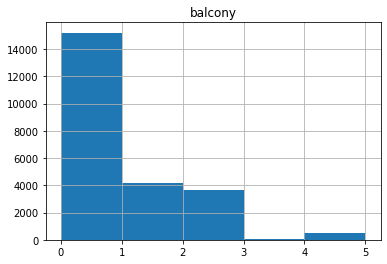

In [95]:
data.hist('balcony', bins=5)

days_exposition - сколько дней было размещено. Нулевых значений нет.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

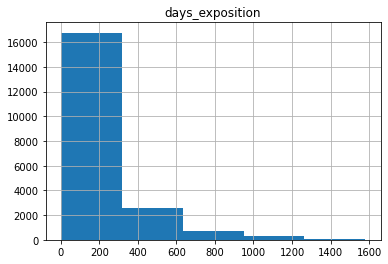

In [96]:
data.hist('days_exposition', bins=5)

Посдчитаем старые обьявления, которым более 3-х лет

In [97]:
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

Объявлению больше 3 лет :  166


Удалим данные строчки

In [98]:
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

In [99]:
print(data['days_exposition'])

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23428, dtype: float64


Так же рассмотрим airports_nearest, где есть квартиры которые находятся в 0 км от аэропорта. Её надо удалить.

In [100]:
print('Растояние до аэропорта менее 1 кв.м : ',data.query('airports_nearest < 1')['airports_nearest'].count())

Растояние до аэропорта менее 1 кв.м :  1


In [101]:
data.drop(index=data.query('airports_nearest < 1').index,inplace=True)

In [102]:
print(data['airports_nearest'])

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23427, dtype: float64


Обновим распределение значений

In [103]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23427.000000,2.342700e+04,23427.000000,23427.000000,23427.000000,23343.000000,21545.000000,23427.000000,21174.000000,23427.000000,17914.000000,17935.000000,17936.000000,7942.000000,17936.000000,8948.000000,20258.000000
mean,9.863790,6.192539e+06,59.643563,2.061468,2.693905,10.681189,34.108992,5.892773,10.466549,0.592393,28807.912136,14237.291553,0.607215,490.197683,0.764050,520.225972,171.868743
std,5.675893,6.213696e+06,32.458226,1.059477,0.210625,6.596396,20.508892,4.882766,5.462061,0.959497,12654.942536,8585.198374,0.798236,339.300885,0.933873,277.505622,197.659948
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,10.000000,1.000000,3.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9350.000000,0.000000,288.000000,0.000000,297.000000,44.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26766.000000,13140.000000,0.000000,455.000000,0.000000,504.000000,94.000000
75%,14.000000,6.700000e+06,69.200000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37313.000000,16303.000000,1.000000,612.000000,1.000000,733.000000,225.000000
max,50.000000,9.900000e+07,494.100000,19.000000,4.500000,60.000000,300.000000,33.000000,70.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,1095.000000


Остальные данные нормальные.

- city_centers_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

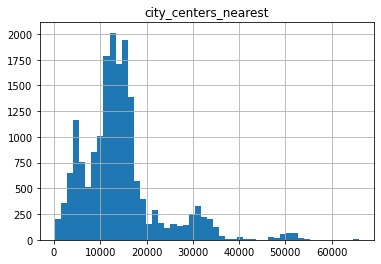

In [104]:
data.hist('city_centers_nearest', bins=50)

array([[<AxesSubplot:title={'center':'parks_around3000'}>]], dtype=object)

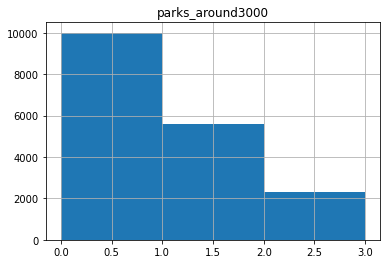

In [105]:
data.hist('parks_around3000', bins=3)

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

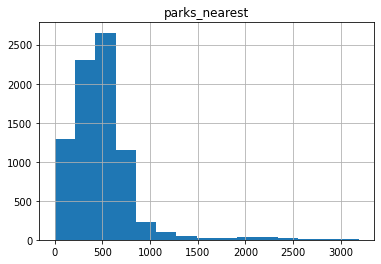

In [106]:
data.hist('parks_nearest', bins=15)

array([[<AxesSubplot:title={'center':'ponds_around3000'}>]], dtype=object)

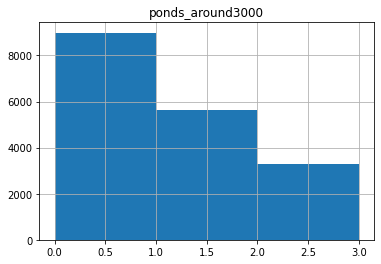

In [107]:
data.hist('ponds_around3000', bins=3)

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

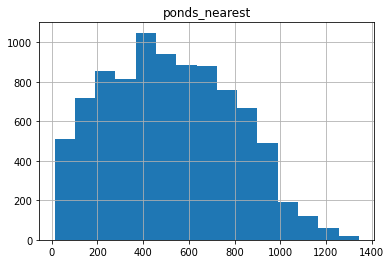

In [108]:
data.hist('ponds_nearest', bins=15)

Cбросим индексацию после удаления строк

In [109]:
data.reset_index(drop=True,inplace=True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23427 non-null  int64         
 1   last_price            23427 non-null  int64         
 2   total_area            23427 non-null  float64       
 3   first_day_exposition  23427 non-null  datetime64[ns]
 4   rooms                 23427 non-null  int64         
 5   ceiling_height        23427 non-null  float64       
 6   floors_total          23343 non-null  float64       
 7   living_area           21545 non-null  float64       
 8   floor                 23427 non-null  int64         
 9   is_apartment          20685 non-null  object        
 10  studio                23427 non-null  bool          
 11  open_plan             23427 non-null  bool          
 12  kitchen_area          21174 non-null  float64       
 13  balcony         

В ходе переработке данных в стобце balcony были заполнены пропуски значением 0, в столбце is_apartment Null был изменен на False. Был изменен тип данных в столбцах last_price, first_day_exposition, is_apartment, balcony. Так же все столбцы были приведены к нижнему регистру, изменено ё на е, а так же городской поселок на поселок городского типа. Изменены названия в неявных дубликатах.
Затем просмотрел значение предмет аномальных значений:
 - last_price убрал цены менее 100 т. руб. и более 100 млн. руб.
 - ceiling_height были убраны квартиры имеющие высоту потолков менее 1.8 м, и более 4.5. 
Дополнительно перевел в дробные значение от 20 до 36.
 - living_area убрал квартиры, где жилая площадь была менее 10 кв.м и более 300 кв.м.
 - kitchen_area убрал квартры, имеющие площадь кухни менее 3 кв.м и более 70 кв.м.
 - days_exposition убрал строчки с обьявлениями, которым более 3-х лет.
 - airports_nearest была убрана квартира, которая находилась менее 1 кв.м от аэропорта.
 
По итогу было удалено 272 строки

### Посчитайте и добавьте в таблицу новые столбцы

цена одного квадратного метра

In [111]:
data['price_one_m_kv'] = data['last_price'] / data['total_area']

In [112]:
data['price_one_m_kv']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23422     72490.845228
23423     52542.372881
23424     44091.710758
23425    149511.400651
23426     41795.665635
Name: price_one_m_kv, Length: 23427, dtype: float64

день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [113]:
data['day_public'] = data['first_day_exposition'].dt.dayofweek

In [114]:
data['day_public']

0        3
1        1
2        3
3        4
4        1
        ..
23422    1
23423    0
23424    6
23425    1
23426    4
Name: day_public, Length: 23427, dtype: int64

месяц публикации объявления

In [115]:
data['month'] = data['first_day_exposition'].dt.month

In [116]:
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23422     3
23423     1
23424     2
23425     3
23426     7
Name: month, Length: 23427, dtype: int64

год публикации объявления

In [117]:
data['year'] = data['first_day_exposition'].dt.year

In [118]:
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23422    2017
23423    2018
23424    2018
23425    2017
23426    2017
Name: year, Length: 23427, dtype: int64

тип этажа квартиры (значения — «первый», «последний», «другой»)

In [119]:
def i(b):
    if b['floor'] == 1:
        return 'первый'
    elif b['floor'] == b['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [120]:
data['tip_etaj_kv'] = data.apply(i, axis=1)

In [121]:
def ii(bb):
    if bb['tip_etaj_kv'] == 'первый':
        return 1
    elif bb['tip_etaj_kv'] == 'последний':
        return 2
    else:
        return 0

In [122]:
data['tip_etaj_kv_dop'] = data.apply(ii, axis=1)

In [123]:
data['tip_etaj_kv']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23422    другой
23423    другой
23424    первый
23425    другой
23426    первый
Name: tip_etaj_kv, Length: 23427, dtype: object

расстояние в км до центра города

In [124]:
data['rastoyanie_km_centr'] = round(data['city_centers_nearest'] / 1000, 0)

In [125]:
data['rastoyanie_km_centr']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23422     4.0
23423     NaN
23424     NaN
23425    10.0
23426     NaN
Name: rastoyanie_km_centr, Length: 23427, dtype: float64

In [126]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_m_kv,day_public,month,year,tip_etaj_kv,tip_etaj_kv_dop,rastoyanie_km_centr
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,1,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23422,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0,4.0
23423,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.372881,0,1,2018,другой,0,NaN
23424,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,NaN,NaN,44091.710758,6,2,2018,первый,1,NaN
23425,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602.0,149511.400651,1,3,2017,другой,0,10.0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23427 non-null  int64         
 1   last_price            23427 non-null  int64         
 2   total_area            23427 non-null  float64       
 3   first_day_exposition  23427 non-null  datetime64[ns]
 4   rooms                 23427 non-null  int64         
 5   ceiling_height        23427 non-null  float64       
 6   floors_total          23343 non-null  float64       
 7   living_area           21545 non-null  float64       
 8   floor                 23427 non-null  int64         
 9   is_apartment          20685 non-null  object        
 10  studio                23427 non-null  bool          
 11  open_plan             23427 non-null  bool          
 12  kitchen_area          21174 non-null  float64       
 13  balcony         

В таблицу были добавлены такие столбцы как цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, расстояние в км до центра города.
Были добавлены 2 столбца тип этажа квартиры (значения — «первый», «последний», «другой») и цифренное обозначение 1,2,0 для дальнейшего удобства

### Проведите исследовательский анализ данных

Построим гистограммы для изучения списка параметров: 
- общая площадь (total_area);
- жилая площадь (living_area);
- площадь кухни (kitchen_area);
- цена объекта (;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Общая площадь

In [128]:
data['total_area'].describe()

count    23427.000000
mean        59.643563
std         32.458226
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        494.100000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

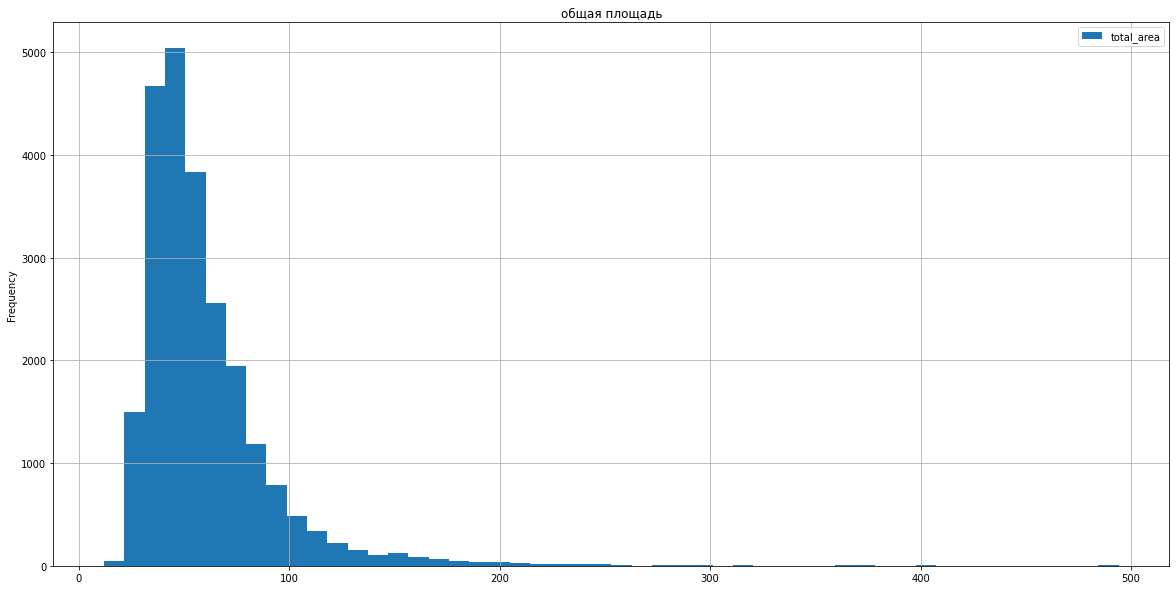

In [129]:
data.plot(kind='hist', y='total_area', title='общая площадь', bins=50, grid=True, figsize=(20,10))

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

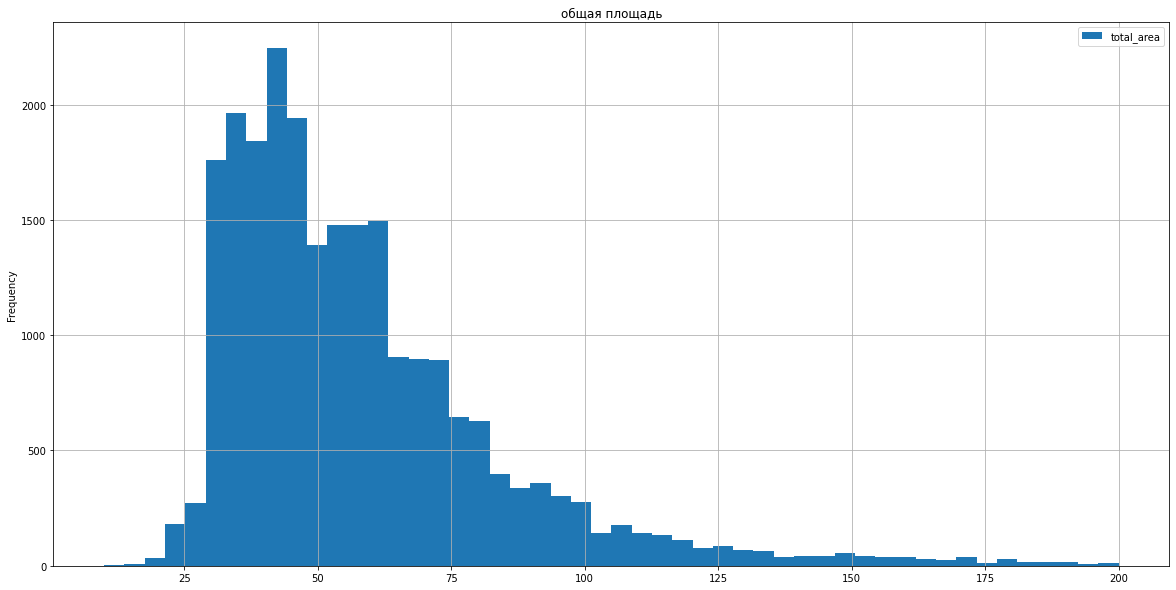

In [130]:
data.plot(kind='hist', y='total_area', title='общая площадь', bins=50, grid=True, figsize=(20,10), range=(10,200))

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

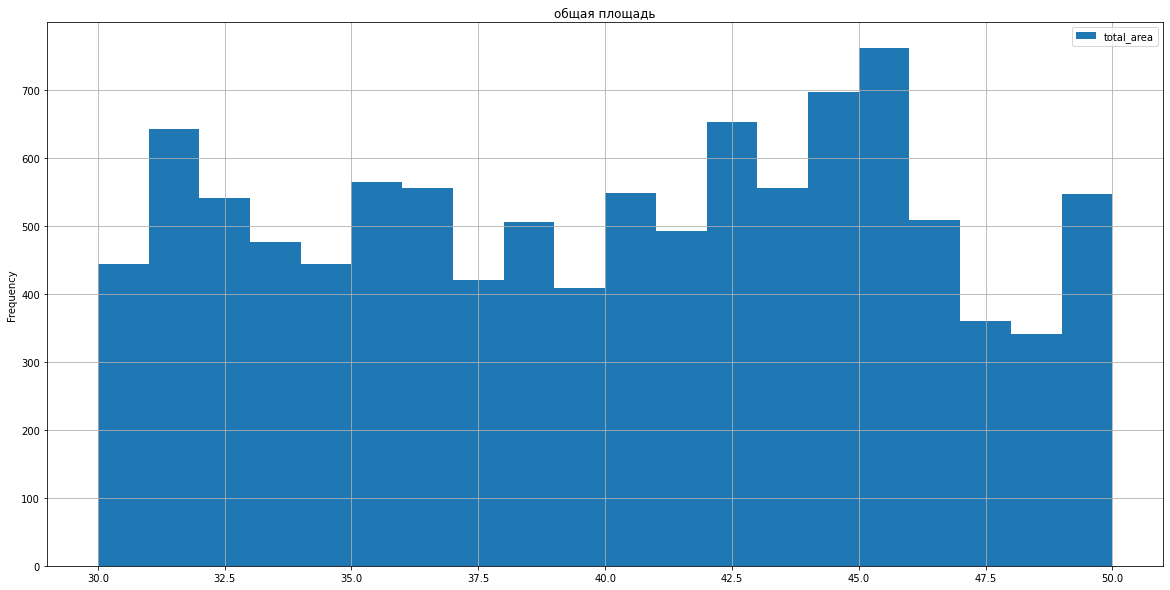

In [131]:
data.plot(kind='hist', y='total_area', title='общая площадь', bins=20, grid=True, figsize=(20,10), range=(30,50))

Основную массу квартир составляют квартиры имеющие площадь от 30 до 50 кв.м. С постипенным увеличением площади уменьшается и число квартир. Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Эти квартиры можно отнести элитной недвижимости. 

Жилая площадь

In [132]:
data['living_area'].describe()

count    21545.000000
mean        34.108992
std         20.508892
min         10.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        300.000000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

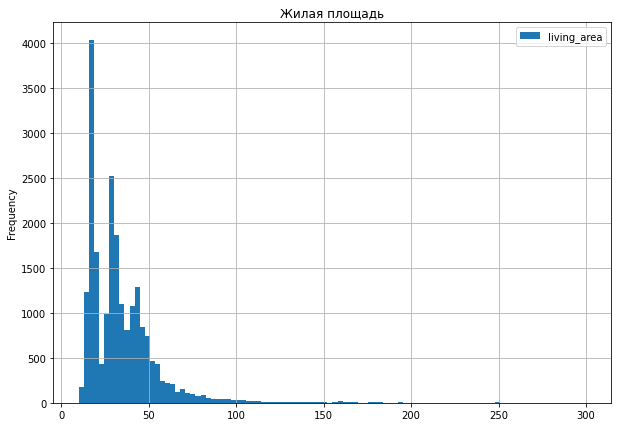

In [133]:
data.plot(kind='hist', y='living_area', title='Жилая площадь', bins=100, grid=True, figsize=(10,7))

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

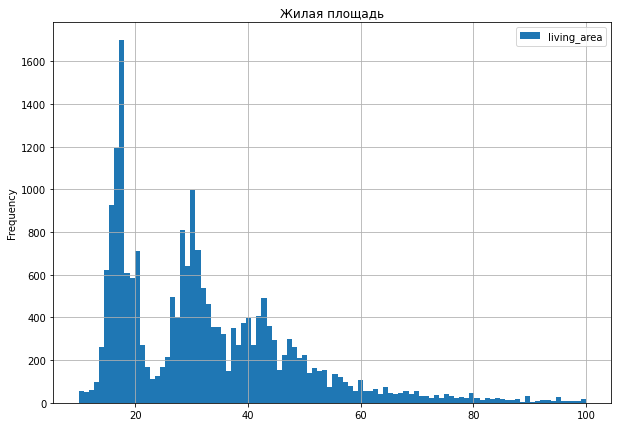

In [134]:
data.plot(kind='hist', y='living_area', title='Жилая площадь',bins=100, grid=True, figsize=(10,7), range=(10,100))

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

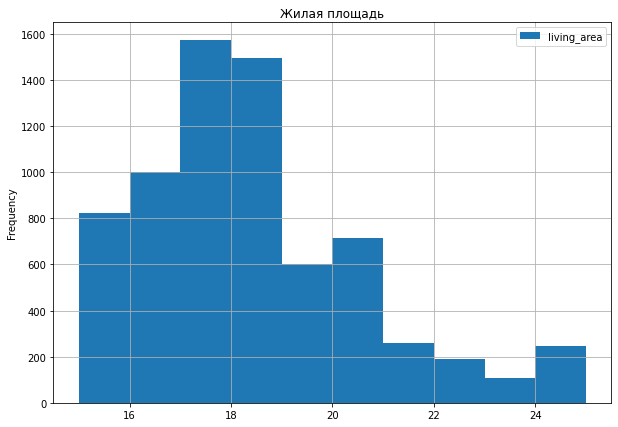

In [135]:
data.plot(kind='hist', y='living_area', title='Жилая площадь',bins=10, grid=True, figsize=(10,7), range=(15,25))

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

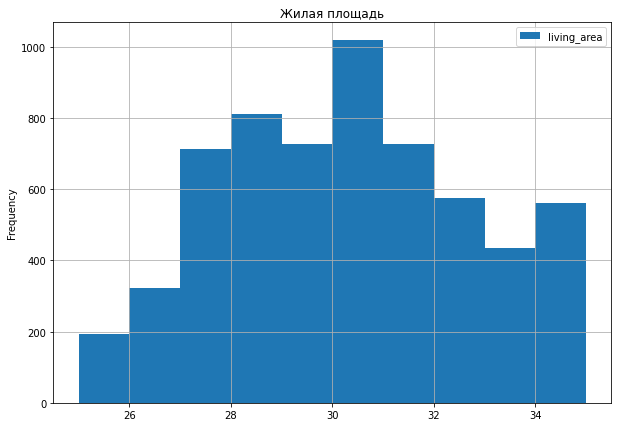

In [136]:
data.plot(kind='hist', y='living_area', title='Жилая площадь',bins=10, grid=True, figsize=(10,7), range=(25,35))

При рассмотре гистограмм жилой пложащи можно выделить 2 пика, наиболее распросранены квартиры имеющую жилую площадь 18 кв.м, и квартиры имеющте площадь кухни 31 кв.м. Квартир имеющие площадь кухни 60 кв.м мало.

Площадь кухни

In [137]:
data['kitchen_area'].describe()

count    21174.000000
mean        10.466549
std          5.462061
min          3.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         70.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

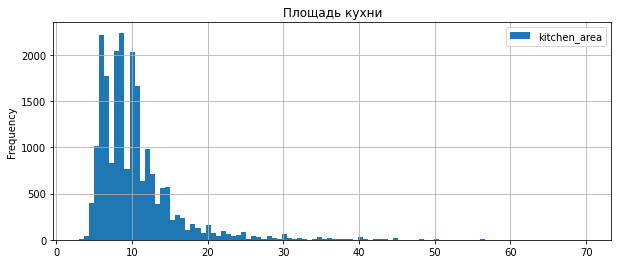

In [138]:
data.plot(kind='hist', y='kitchen_area', title='Площадь кухни',bins=100, grid=True, figsize=(10,4))

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

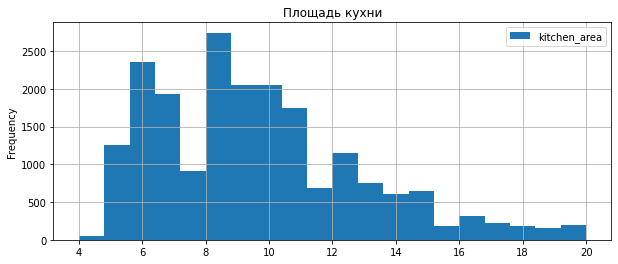

In [139]:
data.plot(kind='hist', y='kitchen_area', title='Площадь кухни',bins=20, grid=True, figsize=(10,4), range=(4,20))

В площади кухни можно выделить 3 пика, наиболее распространены квартиры имеющие площадь кухни 9 кв.м

Цена объекта

In [140]:
data['last_price'].describe()

count    2.342700e+04
mean     6.192539e+06
std      6.213696e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

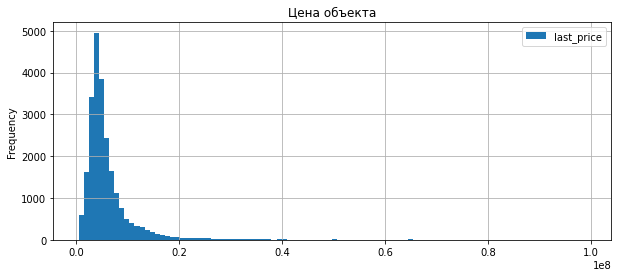

In [141]:
data.plot(kind='hist', y='last_price', title='Цена объекта',bins=100, grid=True, figsize=(10,4))

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

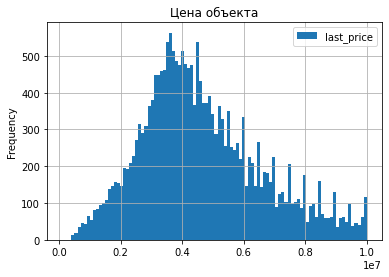

In [142]:
data.plot(kind='hist', y='last_price', title='Цена объекта',bins=100, grid=True, range=(100000,10000000))

Цена объекта выглядит хорошо. Основные пики наблюдаются в диапозоне цены от 3 млн до 5 млн. Так же на графике наблюдается незначительное количество дорогой недвижимости, это похоже илитная недвижимость.

Количество комнат

In [143]:
data['rooms'].describe()

count    23427.000000
mean         2.061468
std          1.059477
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

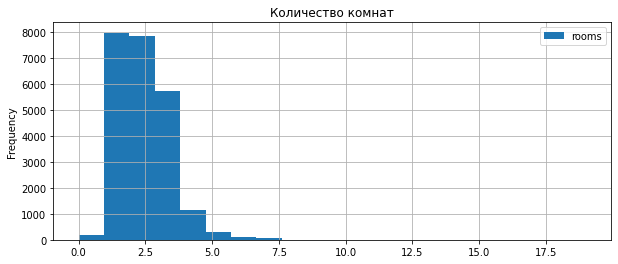

In [144]:
data.plot(kind='hist', y='rooms', title='Количество комнат',bins=20, grid=True, figsize=(10,4))

Больше всего двух- и трёх-комнатных квартир, но встречаются и редкие исключения.

Высота потолков

In [145]:
data['ceiling_height'].describe()

count    23427.000000
mean         2.693905
std          0.210625
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

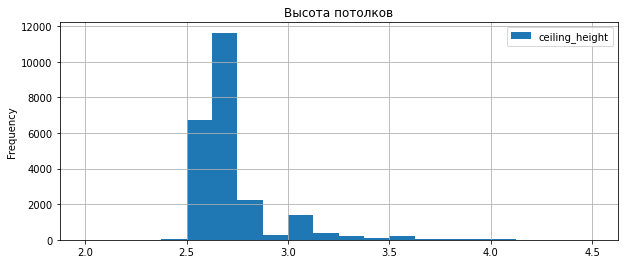

In [146]:
data.plot(kind='hist', y='ceiling_height', title='Высота потолков',bins=20, grid=True, figsize=(10,4))

Здесь два пика 2.5м и 3м, что вполне нормально.

Количество этажей и тип этажа квартиры (первый, последний, другой)

In [147]:
data['floor'].describe()

count    23427.000000
mean         5.892773
std          4.882766
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:title={'center':'Количество этажей'}, ylabel='Frequency'>

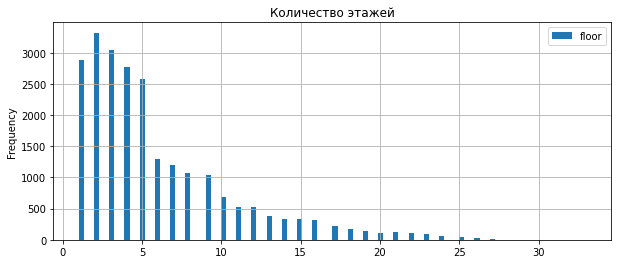

In [148]:
data.plot(kind='hist', y='floor', title='Количество этажей',bins=100, grid=True, figsize=(10,4))

Больше всего квартир с 1 по 5 этаж.

<AxesSubplot:>

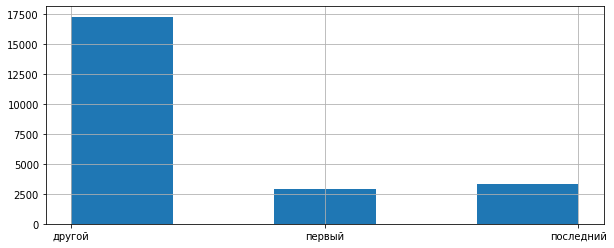

In [149]:
data['tip_etaj_kv'].hist(bins=5, grid=True, figsize=(10,4))

Полученные данные соответствуют реалиям

Общее количество этажей

In [150]:
data['floors_total'].describe()

count    23343.000000
mean        10.681189
std          6.596396
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

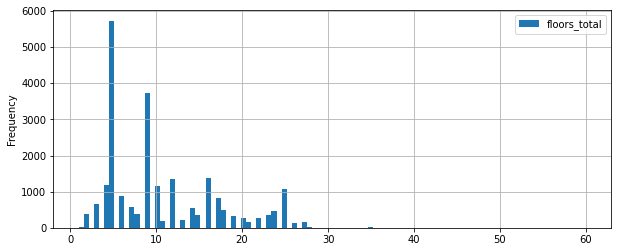

In [151]:
data.plot(kind='hist', y='floors_total', bins=100, grid=True, figsize=(10,4))

<AxesSubplot:ylabel='Frequency'>

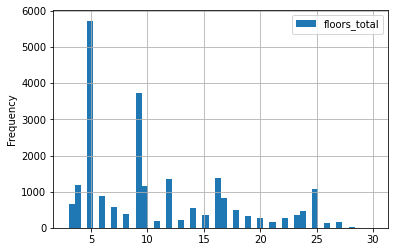

In [152]:
data.plot(kind='hist', y='floors_total', bins=50, grid=True, range=(3,30))

Видим явные пики: 5-и этажный дом, 9-и этажный дом, и небольшие пики более высоких многоэтажных домов.

Расстояние до центра города в метрах

In [153]:
data['city_centers_nearest'].describe()

count    17935.000000
mean     14237.291553
std       8585.198374
min        181.000000
25%       9350.000000
50%      13140.000000
75%      16303.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

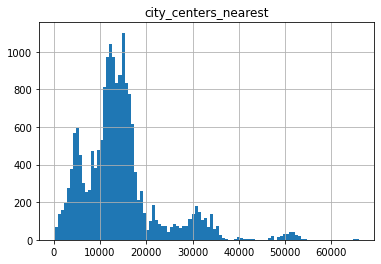

In [154]:
data.hist('city_centers_nearest', bins=100)

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

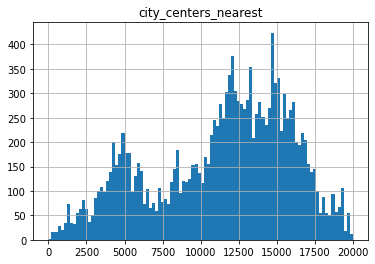

In [155]:
data.hist('city_centers_nearest', bins=100, range=(0,20000))

Здесь наблюдаем три пика, один на 5км и два от 12 км. и на 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.

Расстояние до ближайшего парка

In [156]:
data['parks_nearest'].describe()

count    7942.000000
mean      490.197683
std       339.300885
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

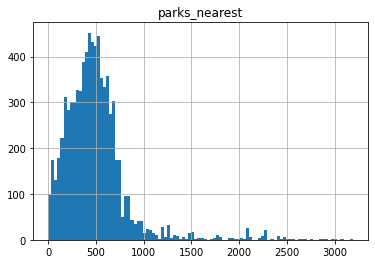

In [157]:
data.hist('parks_nearest', bins=100)

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

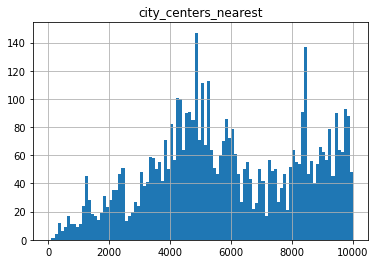

In [158]:
data.hist('city_centers_nearest', bins=100, range=(0,10000))

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

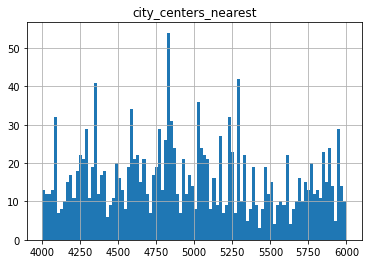

In [159]:
data.hist('city_centers_nearest', bins=100, range=(4000,6000))

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

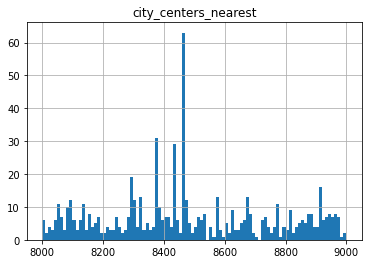

In [160]:
data.hist('city_centers_nearest', bins=100, range=(8000,9000))

Больше всего квартир находящиеся на расстоянии около 5 км, а так же есть пик квартир находящиеся около 8.5 км от парка

Рассмотрим как быстро продавались квартиры.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

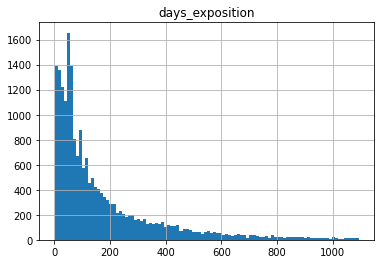

In [161]:
data.hist('days_exposition', bins=100)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

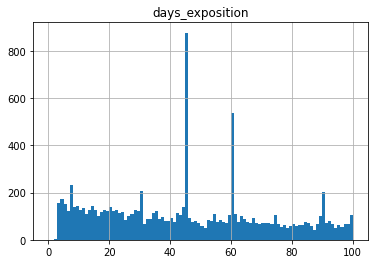

In [162]:
data.hist('days_exposition', bins=100, range = (0,100))

In [163]:
print('Среднее время продажи квартиры:', data['days_exposition'].mean())

Среднее время продажи квартиры: 171.868743212558


In [164]:
print('Медианное время продажи квартиры:', data['days_exposition'].median())

Медианное время продажи квартиры: 94.0


In [165]:
data['days_exposition'].describe()

count    20258.000000
mean       171.868743
std        197.659948
min          1.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1095.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 172 дня. Но если взять медиану - то это уже 94 дней, практически в два раза меньше. Это связано с тем, что некоторые квартиры продавались очень долго.
По квартилям можно сделать вывод что относительно быстрой продажей можно считать период от 44 до 94 дней. Менее 44 дней - это очень быстро. Продажи от 94 до 225 дней можно назвать медленным периодом продажи. Продажи более 225 дней можно считать очень долгими. 

Факторы оторые больше всего влияют на общую (полную) стоимость объекта

In [166]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'day_public',
                  'tip_etaj_kv_dop',
                  'month',
                  'year']

#tip_etaj_kv

In [167]:
for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 76.63%
Корреляция между last_price и living_area составляет: 68.34%
Корреляция между last_price и kitchen_area составляет: 57.81%
Корреляция между last_price и rooms составляет: 47.19%
Корреляция между last_price и day_public составляет: -0.11%
Корреляция между last_price и tip_etaj_kv_dop составляет: -3.62%
Корреляция между last_price и month составляет: 0.55%
Корреляция между last_price и year составляет: -4.21%


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

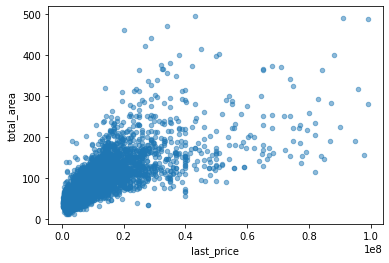

In [168]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

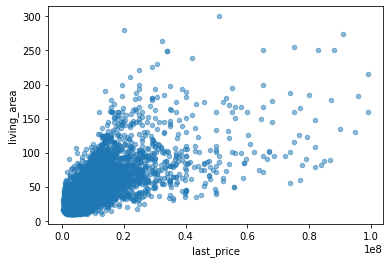

In [169]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

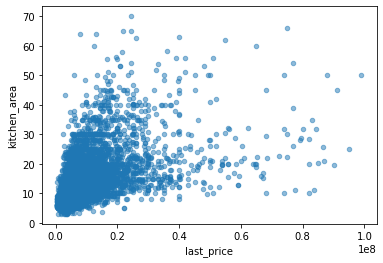

In [170]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='rooms'>

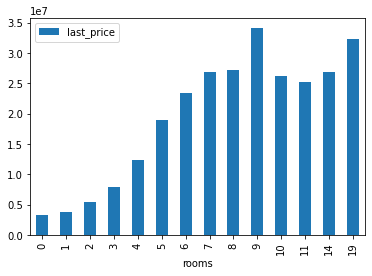

In [171]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

<AxesSubplot:title={'center':'mean'}, xlabel='tip_etaj_kv_dop'>

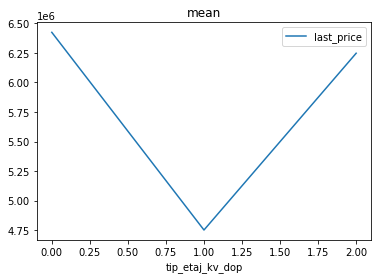

In [172]:
data.pivot_table(index='tip_etaj_kv_dop',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')

<AxesSubplot:title={'center':'median'}, xlabel='tip_etaj_kv_dop'>

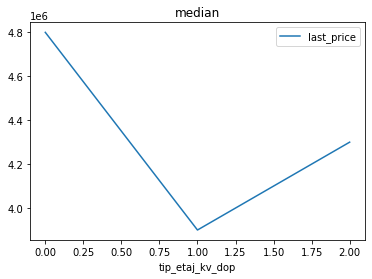

In [173]:
data.pivot_table(index='tip_etaj_kv_dop',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'mean'}, xlabel='month'>

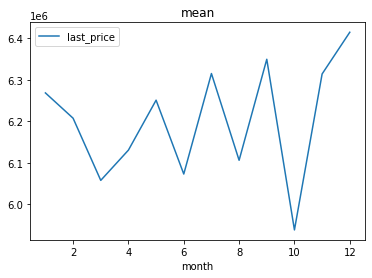

In [174]:
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')

<AxesSubplot:title={'center':'median'}, xlabel='month'>

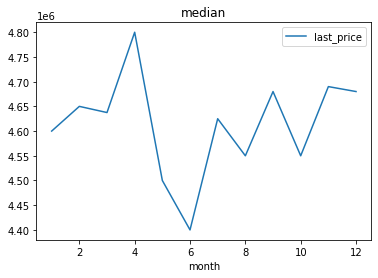

In [175]:
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'mean'}, xlabel='year'>

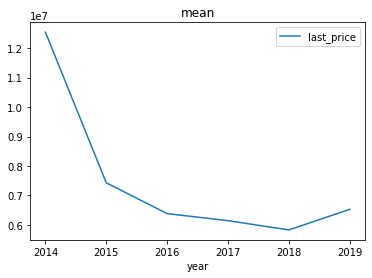

In [176]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')

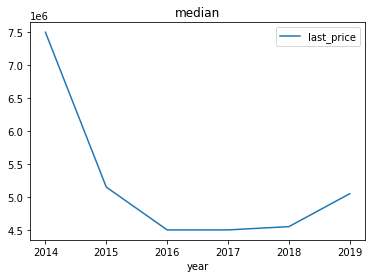

In [177]:
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

На стоимость квартиры больше всего влияют такие факторы как общая площадь квартиры, жилая площадь, площадь кухни и количество комнат.

Практически ни какого влияния не оказывает этаж, на котором рамещена квартира, и дата размещения.

Cредняя цена одного квадратного метра в топ-10 населенных пунктах

In [178]:
х = data.pivot_table(index='locality_name', values='price_one_m_kv', aggfunc=['count', 'mean', 'median']).sort_values(('count', 'price_one_m_kv'), ascending=False).head(10).sort_values(('mean', 'price_one_m_kv'), ascending=False)

In [179]:
х

,count,mean,median
,price_one_m_kv,price_one_m_kv,price_one_m_kv
locality_name,,,
санкт-петербург,15498,113298.369925,104615.384615
пушкин,364,103130.496309,99993.589744
деревня кудрово,298,92454.342295,91831.871902
поселок парголово,326,90103.136772,91579.708641
поселок мурино,552,85713.475104,86059.293995
поселок шушары,438,78661.559055,76876.172608
колпино,337,75402.387902,74722.222222
гатчина,307,68746.146763,67796.610169


Среди населенных пунктов с наибольшим количеством объявлений, макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге.

Расстояние до центра города

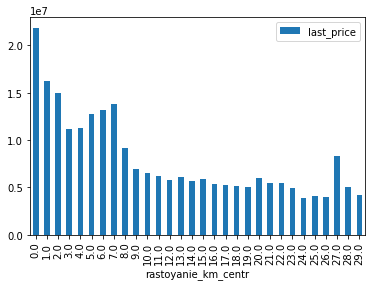

In [180]:
y = data[data['locality_name']=='санкт-петербург'].pivot_table(index='rastoyanie_km_centr',values='last_price',aggfunc='mean').plot(kind='bar')

Больше всего недвижимости до 1км. Более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно.
Далее цена спадает на расстоянии от 8 км. до 27 км. В конце виден пик, на 27 км, вполне возможно это это квартиры находящиеся в особом районе.

В таблицу были добавлены такие столбцы price_one_m_kv, day_public, month, year, tip_etaj_kv, tip_etaj_kv_dop.

Просмотрены такие параменты как:

- общая площадь, где основную массу квартир составляют квартиры имеющие площадь от 30 до 50 кв.м.
- жилая площадь, наиболее распросранены квартиры имеющую жилую площадь 18 кв.м, и квартиры имеющте площадь кухни 31 кв.м.
- площадь кухни, наиболее распростаненные кухни по площади от 6 до 10 кв.м.
- цена объекта наблюдаются в диапозоне цены от 3 млн до 5 млн.
- количество комнат, больше всего имеющих 2-3 комнаты.
- высота потолков, распространены квартиры имеющие высоту 2.5м и 3м.
- тип этажа квартиры («первый», «последний», «другой»), больше всего квартир с 1 по 5 этаж.
- общее количество этажей в доме, распространены 5-и этажные дома, 9-и этажные дома.
- расстояние до центра города в метрах, большая часть квартир находиться от 12 км. до 15 км.
- расстояние до ближайшего парка, больше всего квартир находящиеся на расстоянии около 5 км, а так же есть пик квартир находящиеся около 8.5 км от парка.

Относительно быстрой продажей квартиры можно считать период от 44 до 94 дней. Менее 44 дней - это очень быстро. Продажи от 94 до 225 дней можно назвать медленным периодом продажи. Продажи более 225 дней можно считать очень долгими.
На стоимость квартиры больше всего влияют такие факторы как общая площадь квартиры, жилая площадь, площадь кухни и количество комнат.
Практически ни какого влияния не оказывает этаж, на котором рамещена квартира, и дата размещения.
Среди населенных пунктов с наибольшим количеством объявлений, макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге. 
Больше всего недвижимости в Санкт-Петербурге, которая находиться до 1км от центра. Более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно.

### Общий вывод

В ходе работы быда выполнена предобработка данных. Проведена оптимизация типов данных. Заполнены пропуски данных там, где это было уместно.
Просмотрел данне предмет аномальных значений:
 - last_price убрал цены менее 100 т. руб. и более 100 млн. руб.
 - ceiling_height были убраны квартиры имеющие высоту потолков менее 1.8 м, и более 4.5. 
Дополнительно перевел в дробные значение от 20 до 36.
 - living_area убрал квартиры, где жилая площадь была менее 10 кв.м и более 300 кв.м.
 - kitchen_area убрал квартры, имеющие площадь кухни менее 3 кв.м и более 70 кв.м.
 - days_exposition убрал строчки с обьявлениями, которым более 3-х лет.
 - airports_nearest была убрана квартира, которая находилась менее 1 кв.м от аэропорта.

Были добавлены такие столбцы как цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, расстояние в км до центра города и 2 столбца тип этажа квартиры (значения — «первый», «последний», «другой») и цифренное обозначение 1,2,0 для дальнейшего удобства.

Просмотрены такие параменты как:
 - общая площадь, где основную массу квартир составляют квартиры имеющие площадь от 30 до 50 кв.м.
 - жилая площадь, наиболее распросранены квартиры имеющую жилую площадь 18 кв.м, и квартиры имеющте площадь кухни 31 кв.м.
 - площадь кухни, наиболее распростаненные кухни по площади от 6 до 10 кв.м.
 - цена объекта наблюдаются в диапозоне цены от 3 млн до 5 млн.
 - количество комнат, больше всего имеющих 2-3 комнаты.
 - высота потолков, распространены квартиры имеющие высоту 2.5м и 3м.
 - тип этажа квартиры («первый», «последний», «другой»), больше всего квартир с 1 по 5 этаж.
 - общее количество этажей в доме, распространены 5-и этажные дома, 9-и этажные дома.
 - расстояние до центра города в метрах, большая часть квартир находиться от 12 км. до 15 км.
 - расстояние до ближайшего парка, больше всего квартир находящиеся на расстоянии около 5 км, а так же есть пик квартир находящиеся около 8.5 км от парка.

Среднее время продажи квартиры составляет 172 дня. Но если взять медиану - то это уже 94 дней, практически в два раза меньше. Это связано с тем, что некоторые квартиры продавались очень долго. По квартилям можно сделать вывод что относительно быстрой продажей квартиры можно считать период от 44 до 94 дней. Менее 44 дней - это очень быстро. Продажи от 94 до 225 дней можно назвать медленным периодом продажи. Продажи более 225 дней можно считать очень долгими.

На стоимость квартиры больше всего влияют такие факторы как общая площадь квартиры, жилая площадь, площадь кухни и количество комнат. Практически ни какого влияния не оказывает этаж, на котором рамещена квартира, и дата размещения.

Среди населенных пунктов с наибольшим количеством объявлений, макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге.
Больше всего недвижимости в Санкт-Петербурге, которая находиться до 1км от центра. Более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно. Далее цена спадает на расстоянии от 8 км. до 27 км. В конце виден пик, на 27 км, вполне возможно это это квартиры находящиеся в особом районе.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод